In [33]:
import numpy as np
import pandas as pd

In [34]:
df = pd.read_csv("Kenya_Schools.csv")
df.head()

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
0,VOO SPECIAL UNIT,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY & BOARDING,SPECIAL SCHOOL,19.0,19.0,6.3,...,0,EASTERN,KITUI,MUTHA,VOO,MUTITO,"(-1.66668, 38.32132)",-1.666680,38.321320,KITUI
1,MASAANTARE PRI,PRIMARY SCHOOL,PUBLIC,RELIGIOUS ORGANIZATION,MIXED,DAY ONLY,ORDINARY,44.3,53.2,88.7,...,1,RIFT VALLEY,NAROK,OLOLUNGA,NAROK SOUTH,OLOLUNGA,"(-1.012145, 35.648155)",-1.012145,35.648155,NAROK
2,NGOCHONI PRY SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMET/DEB,MIXED,DAY ONLY,ORDINARY,37.6,32.9,131.5,...,0,NYANZA,KURIA,MABERA,BUGUMBE WEST,KURIA,"(-1.159798, 34.394076)",-1.159798,34.394076,MIGORI
3,NEEMA JUNIOR ACADEMY,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,18.9,22.0,44.0,...,1,CENTRAL,THIKA,KAMWANGI,MANGU,GATUNDU NORTH,"(-0.99747, 36.93082)",-0.997470,36.930820,KIAMBU
4,LWANDA PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,42.0,52.5,0.0,...,0,NYANZA,RACHUONYO,KABONDO,KAWOUR,KASIPUL KABONDO,"(-0.42783, 34.92995)",-0.427830,34.929950,HOMA BAY


In [35]:
#subset the dataframe to filter by column
ll = df.loc[df['County'] == 'NAIROBI']
ll.head()

,Name of School,Level of Education,Status of School,Sponsor of School,School Institution Type_1,School Institution Type_2,School Institution Type_3,Pupil Teacher Ratio,Pupil Classroom Ratio,Pupil Toilet Ratio,...,Non-Teaching Staff Female,Province,District,Division,Location,Costituency,Geolocation,Latitude,Longitude,County
21,RABAI ROAD PRI SCH,PRIMARY SCHOOL,PUBLIC,CENTRAL GOVERNMENT/DEB,MIXED,DAY ONLY,ORDINARY,35.4,46.4,41.3,...,3,NAIROBI,NAIROBI,MAKADARA,MAKADARA,MAKADARA,"(-1.286176, 36.872801)",-1.286176,36.872801,NAIROBI
24,JOVIAL ACADEMY PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,0.0,0.0,0.0,...,0,NAIROBI,NAIROBI,EMBAKASI,UMOJA,EMBAKASI,"(-1.28058, 36.90975)",-1.280580,36.909750,NAIROBI
32,SALAMA PRI SCH,PRIMARY SCHOOL,PUBLIC,LOCAL GOVERNMENT AUTHORITY,MIXED,DAY ONLY,ORDINARY,48.7,66.9,76.5,...,7,NAIROBI,NAIROBI,STAREHE,HURUMA,STAREHE,"(-1.257462, 36.870696)",-1.257462,36.870696,NAIROBI
40,SHARPENER CHILDRENS CENTRE - PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,11.0,11.0,5.5,...,0,NAIROBI,NAIROBI,KASARANI,RUARAKA,KASARANI,"(-1.248647, 36.874616)",-1.248647,36.874616,NAIROBI
49,HOPE GLAM ACADEMY PRI,PRIMARY SCHOOL,PRIVATE,PRIVATE INDIVIDUAL,MIXED,DAY ONLY,ORDINARY,14.0,14.0,14.0,...,0,NAIROBI,NAIROBI,EMBAKASI,KAYOLE,EMBAKASI,"(-1.269801, 36.911758)",-1.269801,36.911758,NAIROBI


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Fetch specific column values from the subset
X = ll['Total Number of Classrooms']
Y = ll['Total Enrolment']

In [38]:
#training data, 80%
xTrain = X[:1024]
yTrain = Y[:1024]
xTest = X[1024:]
yTest = Y[1024:]

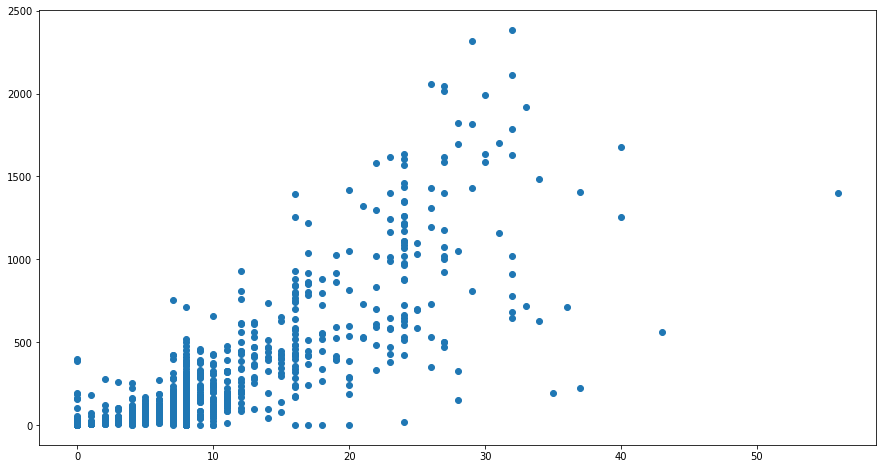

In [39]:
#Plot training data
plt.figure(figsize=(15, 8))
plt.scatter(xTrain, yTrain)

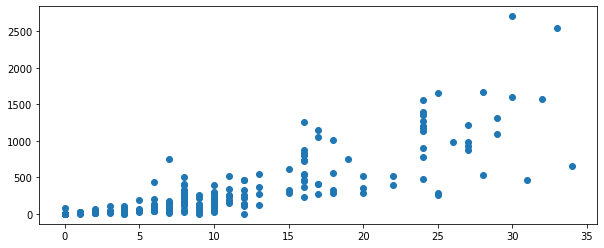

In [41]:
#plot testing data
plt.figure(figsize=(10, 4))
plt.scatter(xTest, yTest)

In [42]:
from scipy import stats

In [46]:
# Entire dataset 
r = stats.linregress(X, Y)
r

LinregressResult(slope=39.253505504668745, intercept=-83.15660604860494, rvalue=0.8179977896003555, pvalue=3.197484523601706e-309, stderr=0.7721397253634185)

In [47]:
# Training data set
r2 = stats.linregress(xTrain, yTrain)
r2

LinregressResult(slope=38.40812053887466, intercept=-77.48156782477179, rvalue=0.8174345270161376, pvalue=4.495802164496318e-247, stderr=0.8466098966122552)

In [48]:
# Testing data set
r3 = stats.linregress(xTest, yTest)
r3

LinregressResult(slope=42.678430747852175, intercept=-108.13470617035256, rvalue=0.8225887132553475, pvalue=3.244786816148333e-64, stderr=1.8511593244638929)

In [50]:
#using the training dataset
def myfunc(x):
    return r2.slope * x + r2.intercept

In [51]:
# using testing dataset
def myfunc1(x):
    return r3.slope * x + r3.intercept

In [52]:
# using entire dataset
def myfunc2(x):
    return r.slope * x + r.intercept

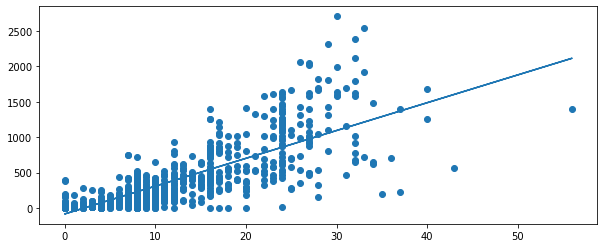

In [55]:
 #Fit entire dataset
plt.figure(figsize=(10, 4))
plt.scatter(X, Y)
newModel = list(map(myfunc2, X))
plt.plot(X, newModel)

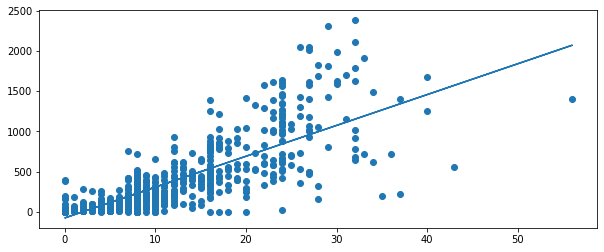

In [56]:
 #Fit training dataset
plt.figure(figsize=(10, 4))
plt.scatter(xTrain, yTrain)
newModel = list(map(myfunc, xTrain))
plt.plot(xTrain, newModel)

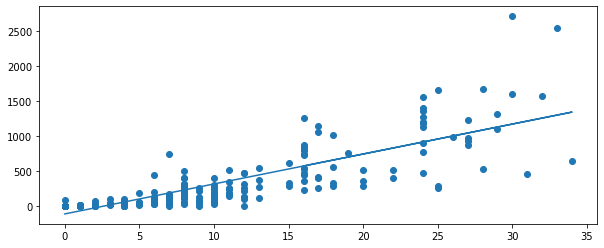

In [57]:
 #Fit testing dataset
plt.figure(figsize=(10, 4))
plt.scatter(xTest, yTest)
newModel = list(map(myfunc1, xTest))
plt.plot(xTest, newModel)